K-Nearest Neighbour
1. Consider the Cork Stoppers Data Set<p>
• Find the two most significant features according to the Kruskall-Wallis filter method

In [2]:
import numpy as np
import plotly.express as px
import pandas as pd
from scipy import stats


Labels=["Super","Average","Poor"]        
xlsFile=pd.read_excel("/Users/cesarteixeira/Documents/AulasRepo/ML/Datasets/CORK_STOPPERS.XLS",
                      sheet_name="Data",
                      usecols=["C","ART","N.1","PRT","ARM","PRM","ARTG","NG","PRTG","RAAR","RAN"])
CorkStopp=pd.DataFrame(data=xlsFile.dropna())

fnames=CorkStopp.columns[1:]

ixSuper=np.where(CorkStopp['C']==1)
ixAverage=np.where(CorkStopp['C']==2)
ixPoor=np.where(CorkStopp['C']==3)

X=CorkStopp.to_numpy()[:,1:]
X=X.astype(float)

Hs={}
for i in range(np.shape(X)[1]):
    st=stats.kruskal(X[ixPoor,i].flatten(), X[ixAverage,i].flatten(), X[ixSuper,i].flatten())
    Hs[fnames[i]]=st.statistic


Hs = sorted(Hs.items(), key=lambda x: x[1],reverse=True)  

print("Ranked features")

for f in Hs:
    print(f[0]+"-->"+str(f[1]))


Ranked features
ART-->121.58964258474009
PRM-->117.63782046335828
PRT-->115.74851860346449
ARTG-->115.21685092055695
ARM-->113.53079541575394
PRTG-->113.33179317347778
RAAR-->105.18901177731905
NG-->104.41349241044973
RAN-->94.28568910767306
N.1-->74.49926324214721


Build two datasets using the Hold-Out method. Consider 50% of the patterns for training and 50% for testing.

In [33]:
from sklearn.model_selection import train_test_split

X=np.array([CorkStopp['ART'].to_numpy(),CorkStopp['PRM'].to_numpy()]).T
y=CorkStopp['C'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5)

#Obtain training standardization factors and standardize training and testing data
muTr=np.mean(X_train,axis=0)
stdTr=np.std(X_train,axis=0)

X_train=(X_train-muTr)/stdTr
X_test=(X_test-muTr)/stdTr
print(X_train)

[[ 0.95047858  0.69625843]
 [-0.23785449 -0.43903902]
 [-1.28058153 -1.39372096]
 [-0.44452111 -0.5809512 ]
 [ 0.93638767  1.31121121]
 [-0.60421805 -0.61535415]
 [ 0.02987272  0.22321783]
 [-0.90952101 -1.20450472]
 [-1.13027854 -1.29911284]
 [ 1.74896325  1.21660309]
 [-0.38815749 -0.5938523 ]
 [-0.77800589 -1.04969143]
 [-1.49194512 -1.3464169 ]
 [ 0.95517555  0.30062447]
 [ 1.50941785  0.19311524]
 [-1.06921794 -1.32061468]
 [-0.8061877  -0.40893643]
 [ 1.63153903  1.2295042 ]
 [-0.69346045  0.19741561]
 [ 1.01623614  1.42732118]
 [ 0.74381196  0.30062447]
 [ 1.19941791  1.77565107]
 [-1.27588456 -0.58955194]
 [ 2.48638733  2.19708724]
 [ 1.44366028  1.19080087]
 [ 0.01108485 -0.13801318]
 [-1.1208846  -1.39372096]
 [-0.78739982 -0.30142721]
 [-0.28952115 -0.49064345]
 [-0.44452111 -0.03910469]
 [-0.18618784  0.50704219]
 [-0.92830888 -0.18961761]
 [-1.06921794 -0.95508331]
 [ 0.07684241 -0.02190321]
 [ 0.00638788 -0.18101687]
 [-0.46330899 -0.34013053]
 [-1.29936941 -1.38081985]
 

Perform a K-NN classification of the in order to discriminate between classes w1, w2 and w3. Consider k=1 and k=7. Plot the decision boundaries and the testing errors.

Error (%)=21.333333333333336
Error (%)=13.33333333333333


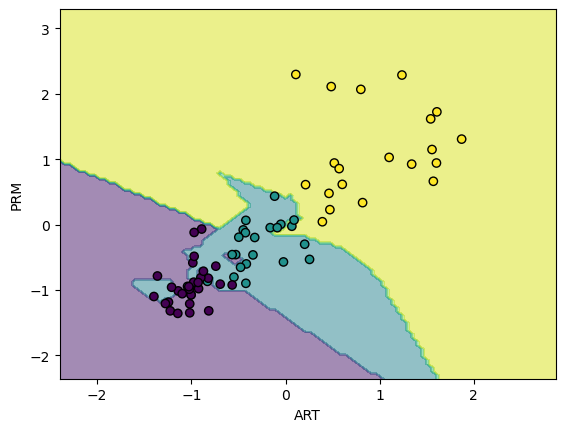

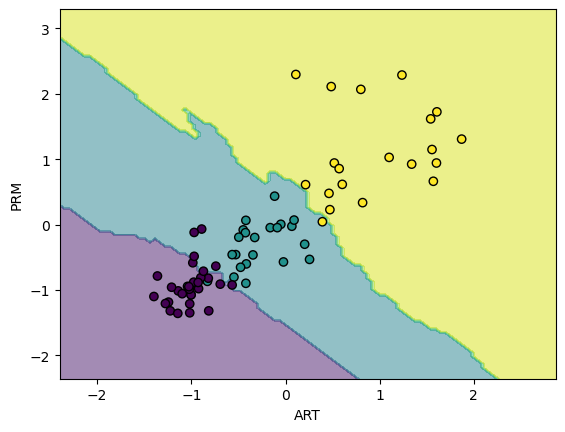

In [35]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

#For k=1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

yp=knn1.predict(X_test)

Hits=(np.where(yp==y_test)[0]).shape[0]

Acc=Hits/y_test.shape[0]

Err=(1-Acc)*100

print("Error (%)="+str(Err))

disp = DecisionBoundaryDisplay.from_estimator(
    knn1, X_test, response_method="predict",
    xlabel="ART", ylabel="PRM",
    alpha=0.5,
)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")


#For k=7
knn3 = KNeighborsClassifier(n_neighbors=7)
knn3.fit(X_train, y_train)

yp=knn3.predict(X_test)

Hits=(np.where(yp==y_test)[0]).shape[0]

Acc=Hits/y_test.shape[0]

Err=(1-Acc)*100

print("Error (%)="+str(Err))

disp = DecisionBoundaryDisplay.from_estimator(
    knn3, X_test, response_method="predict",
    xlabel="ART", ylabel="PRM",
    alpha=0.5,
)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")


Develop a schema to find the appropriate number of neighbors. Plot the decision boundaries and the testing error for the better solution.<b>
Note: A robust estimation implies the reporting of statistical measures that account for bias and variability, such as mean and variance.

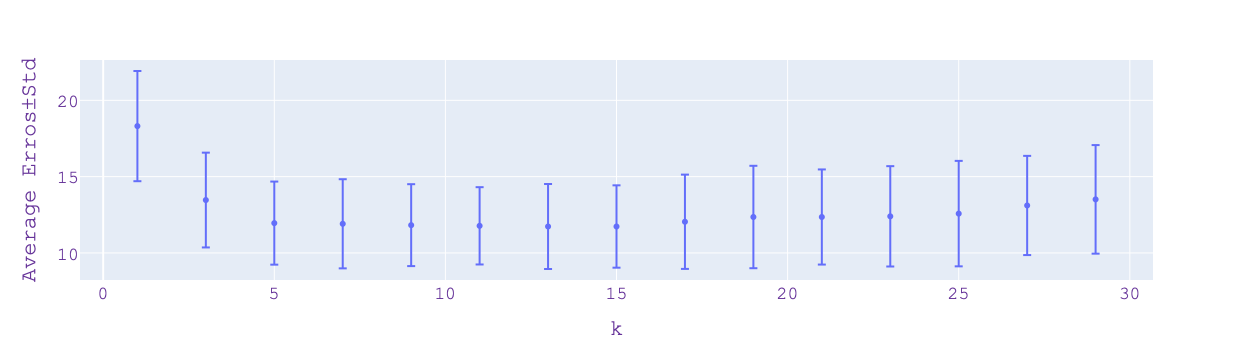

Best k=13
Error (%)=9.333333333333337


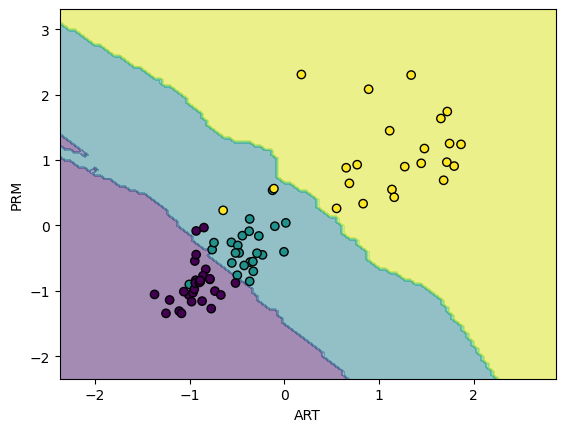

In [37]:
import plotly.express as px
runs=np.arange(0,30)
ks=np.arange(1,30,2)

errMat=np.zeros((runs.shape[0],ks.shape[0]))

for r in runs:#Create several training/testing partitions
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5)
    #Obtain training standardization factors and standardize training and testing data
    muTr=np.mean(X_train,axis=0)
    stdTr=np.std(X_train,axis=0)
    X_train=(X_train-muTr)/stdTr
    X_test=(X_test-muTr)/stdTr
    
    ki=0
    for k in ks:#Evaluate different ks
        #fit knn
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        yp=knn.predict(X_test)
        #Evaluate error
        Hits=(np.where(yp==y_test)[0]).shape[0]
        Acc=Hits/y_test.shape[0]
        
        #Store error
        errMat[r,ki]=(1-Acc)*100
        ki=ki+1
#at the end compute average error and error standard deviation
avgError=np.mean(errMat,axis=0)
stdError=np.std(errMat,axis=0)
 
#Display average error as function of k
fig = px.scatter(x=ks, y=avgError,error_y=stdError)
fig.update_layout(
    xaxis=dict(
        title=dict(
            text="k"
        )
    ),
    yaxis=dict(
        title=dict(
            text="Average Erros±Std"
        )
    ),
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

#Fing the best k
optK=ks[np.where(avgError==np.min(avgError))[0]][0]
print("Best k="+str(optK))

#Train again knn with best k
knn = KNeighborsClassifier(n_neighbors=optK)
knn.fit(X_train, y_train)

yp=knn.predict(X_test)

Hits=(np.where(yp==y_test)[0]).shape[0]

Acc=Hits/y_test.shape[0]

Err=(1-Acc)*100

print("Error (%)="+str(Err))

disp = DecisionBoundaryDisplay.from_estimator(
    knn, X_test, response_method="predict",
    xlabel="ART", ylabel="PRM",
    alpha=0.5,
)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
